A través de la biblioteca **email**, se seleccionan todos los "body" incluidos en cada uno de los archivos del repositorio y se concatenan en un solo archivo: **email_body.txt** 

In [7]:
import os
import git
from email.parser import Parser

rootdir = '/workspaces/ClasificadorCorreosGPT4/'

def email_analyse(inputfile, email_body):
    with open(inputfile, "r") as f:
        data = f.read()

    email = Parser().parsestr(data)
    
    email_body.append(email.get_payload())

email_body = []

for directory, subdirectory, filenames in os.walk(rootdir):
    for filename in filenames:
        try:
            email_analyse(os.path.join(directory, filename), email_body)
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

with open("email_body.txt", "w") as f:
    for email_bod in email_body:
        if email_bod:
            f.write(str(email_bod))

Error processing file index: 'utf-8' codec can't decode byte 0x81 in position 13: invalid start byte
Error processing file ec63f5ee0789ad560204d3eb4d1935b830e7ec: 'utf-8' codec can't decode byte 0xb0 in position 7: invalid start byte
Error processing file 96d252b3e4cff33953b3a2a34841ba4c20e230: 'utf-8' codec can't decode byte 0xc9 in position 4: invalid continuation byte
Error processing file 03a8ff6710bb05e242d9e3e0ba13d9216addf5: 'utf-8' codec can't decode byte 0x8d in position 3: invalid start byte
Error processing file pack-6be8150f5bc58305f903d6dbf76c51c5a8b9f030.pack: 'utf-8' codec can't decode byte 0x9c in position 12: invalid start byte
Error processing file pack-6be8150f5bc58305f903d6dbf76c51c5a8b9f030.rev: 'utf-8' codec can't decode byte 0xe8 in position 209: invalid continuation byte
Error processing file pack-6be8150f5bc58305f903d6dbf76c51c5a8b9f030.idx: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
Error processing file 434218cc05f4ed333bc1e19e3ea9

a partir de Analisis Exploratorio de Datos (el cual se mostrará posteriormente) se identifica que en el documento generado email_body.txt  existe información que genera ruido y debe ser limpiada. Por lo cual se implementó el siguiente tratamiento con ayuda de la biblioteca **re**

In [1]:
import re

def clean_email_text(filename, new_filename):

    un_words_1 = ["Thanks for your time","hope to see you","see you there","Looking forward to your feedback","regards","best regards"]
    un_words_2 = ['Return-Path','Received','X-MimeOLE',"charset","attachment; filename","quoted-printable","mailto",'Message-Id',"The original message was received at",'Content-','MIME-','by postmaster',"X-MS","Thread-","X-mailer","X-sender","X-Authentication",'Get your FREE download']
    un_words_3 = ['Host unknown','intermail','SMTP','base64','Copyright']
    
    with open(filename, 'r', encoding='utf-8') as file, open(new_filename, 'w', encoding='utf-8') as outfile:
        
        All_txt = file.read()
        
        # Limpieza
        line = re.sub(r'=\n', '', All_txt)# Eliminar "=" seguido de un salto de línea
        line = re.sub(r'^.*\t\s+\bPST\b\t\s+.*\n', ' ', line, flags=re.IGNORECASE | re.MULTILINE)
        line = re.sub(r'The following section of this message[\s\S]*?\n\n', ' ', line, flags=re.IGNORECASE | re.MULTILINE)
        line = re.sub(r'This message is for the[\s\S]*?\n\n', ' ', line, flags=re.IGNORECASE | re.MULTILINE)
        line = re.sub(r'This message may contain[\s\S]*?\n\n', ' ', line, flags=re.IGNORECASE | re.MULTILINE)
        line = re.sub(r'This email and any files[\s\S]*?\n\n', ' ', line, flags=re.IGNORECASE | re.MULTILINE)
        line = re.sub(r'This\s+e-mail is the property of Enron\s+Corp\.[\s\S]*?Thank you', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'this email may contain[\s\S]*?\n\n', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'^This email message is for the sole use[\s\S]*?\bLLP\b', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'Privileged/Confidential[\s\S]*?consent\s*to', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'The information contained in this transmission[\s\S]*?original message\.', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'contain confidential and privileged information[\s\S]*?original message\.', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'Please click on the link below to indicate[\s\S]*?Return\.', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'The information transmitted is[\s\S]*?computer\.', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'The information transmitted is[\s\S]*?computers\.', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'PG&E National Energy Group and any other[\s\S]*?\n\n', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'The following expense report[\s\S]*?Expense\.', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'\*{1,40}NOTICE\*{1,40}[\s\S]*?Thank you\.', ' ', line, flags=re.IGNORECASE)
        line = re.sub(r'This e-mail message may contain legally privileged and/or confidential[\s\S]*?from\s+your\s+computer\.', ' ', line, flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'To reply to our[\s\S]*?\n\n', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'CONFIDENTIALITY NOTICE[\s\S]*?\n\n', ' ', line, flags=re.IGNORECASE|re.MULTILINE)
        line = re.sub(r'CONFIDENTIAL:[\s\S]*?\n\n', ' ', line, flags=re.IGNORECASE|re.MULTILINE)
        line = re.sub(r'This e-mail, including[\s\S]*?\n\n', ' ', line,flags=re.MULTILINE | re.IGNORECASE)
        line = re.sub(r'Internet Email[\s\S]*?\n\n', ' ', line, flags=re.IGNORECASE|re.MULTILINE)
        line = re.sub(r'\-{3,15}.+?\-{3,15}\n?', ' ', line) # Eliminar mensajes de rebote u otros patrones
        line = re.sub(r'http[^\s\n]+', ' ', line, flags=re.IGNORECASE|re.MULTILINE)
        line = re.sub(r'<.*?>.*\n', ' ', line)  # Eliminar etiquetas HTML
        line = re.sub(r'\b(?:' + '|'.join(map(re.escape, un_words_1)) + r')\b', ' ', line, flags=re.IGNORECASE) #Eliminar palabras de la lista un_words_1
        line = re.sub(r'.*\[\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\].*\n?',' ' , line) #Eliminar líneas con direcciones IP
        line = re.sub(r'~~~~|====[^\n]*\n', ' ', line, flags=re.MULTILINE)
        line = re.sub(r'[^\w\n]{3,}\n', ' ', line, flags=re.MULTILINE)
        line = re.sub(r'@enron.com|@enron', '@', line, flags=re.IGNORECASE) # Borrar el Dominio Enron de los correos electronicos
        line = re.sub(r'^(' + '|'.join(un_words_2) + r').*\n?', '', line, flags=re.MULTILINE | re.IGNORECASE) #Eliminar palabras de la lista un_words_2
        line = re.sub(r'^\s+', '' , line, flags=re.MULTILINE) #Eliminar cualquier espacio en blanco existente al comienzo de cada linea
        line = re.sub(r'^>', '', line, flags=re.MULTILINE) #Eliminar las líneas que comienzan con ">"
        line = re.sub(r'^.*(' + '|'.join(un_words_3) + r').*\n?', '', line, flags=re.MULTILINE  | re.IGNORECASE) #Eliminar palabras de la lista un_words_3 
                        
        outfile.write(line)
        
clean_email_text('email_body.txt', 'Clean_email_body.txt')

En el trabajo de limpieza realizado se atacaron diversidad de información contenida en los correos, correspondiente a mensajes de confidencialidad, muy tipicos de una firma de correo en una corporación (no solo de la corporación Enron, ya que también se incluyeron mensajes provenientes de otras corporaciones, a las cuales la corp enron les daba respuesta). Se realizó un analisis del texto encontrado con estas caracterisiticas y se parametrizó en el codigo para que se eliminara de una manera justa (solamente el mensaje de confidencialidad), a fin de no afectar la información incluida en el cuerpo del mensaje, que es precismanete el texto que se quiere analizar. Se eliminaron también patrones muy tipicos de mensajes de rebote, de correo spam, direcciones de internet, codigo HTML, "tablas de datos númericos"  entre otros que fueron identificados generando ruido. La creación de las listas fue un diseño que segmento 3 grupos de palabras diferentes y es de utilidad por si se requieren agregar más palabras a las listas, a cada grupo de palabras se le realiza un tratamiento de limpieza diferente. Es importante precisar que el trabajo de limpieza de los datos influye de manera directa en el posterior analisis por lo cual, entre más limpio se encuentre el archivo mejor será el analisis de datos.

# EDA

Todo el trabajo realizado anteriormente ya se encuentra almacenado en el documento **Clean_email_body.txt** el cual se encuentra almacenado en la ruta:  `/workspaces/ClasificadorCorreosGPT4/Clean_email_body.txt`.

Dentro de esta sección se definiran funciones, a las cuales se les cargara el documento previamente generado, a fin de obtener la información a analizar.

## 1. Preprocesamiento de Texto

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import bigrams, trigrams, ngrams
from collections import Counter

In [3]:
# stopwords se carga por unica vez y se convierte en un conjunto
stop_words_set = set(stopwords.words('english'))

# Función para leer y reprocesar el archivo
def read_and_preprocess(filename):
    with open(filename, "r", encoding='utf-8') as file:
        content = file.read().lower()
    words = re.findall(r'\w+', content)
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words_set]
    return filtered_words

# Función de Conteo de palabras
def word_count(words):
    return Counter(words)

# Función de lematizador
lemmatizer = WordNetLemmatizer()
def lemmatize_text(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Función de creación/conteo de n-gramas: 
def count_ngrams(words, n=2):
    if n == 2:
        n_grams = bigrams(words)
    elif n == 3:
        n_grams = trigrams(words)
    else:
        n_grams = ngrams(words, n)
    return Counter([' '.join(gram) for gram in n_grams])

# Función de Matriz Co-ocurrencia
def co_occurrence_matrix(words, n=2):
    n_grams = list(ngrams(words, n))
    return Counter(n_grams)

### Visualización de las funciones y creación de variables:

In [4]:
# Leer y Preprocesar el archivo
filtered_words = read_and_preprocess('Clean_email_body.txt')

# Generación de Metricas
word_frequency = word_count(filtered_words)
#unique_words = list(word_frequency.keys())  # Obtener las claves (palabras únicas)
lemmatized_words = lemmatize_text(filtered_words)
word_counter = Counter(lemmatized_words)
bigram_frequency = count_ngrams(filtered_words, 2)
trigram_frequency = count_ngrams(filtered_words, 3)
ngram_frequency = count_ngrams(filtered_words, 4)
result_matrix = co_occurrence_matrix(filtered_words, 5)


### Frecuencia de palabras

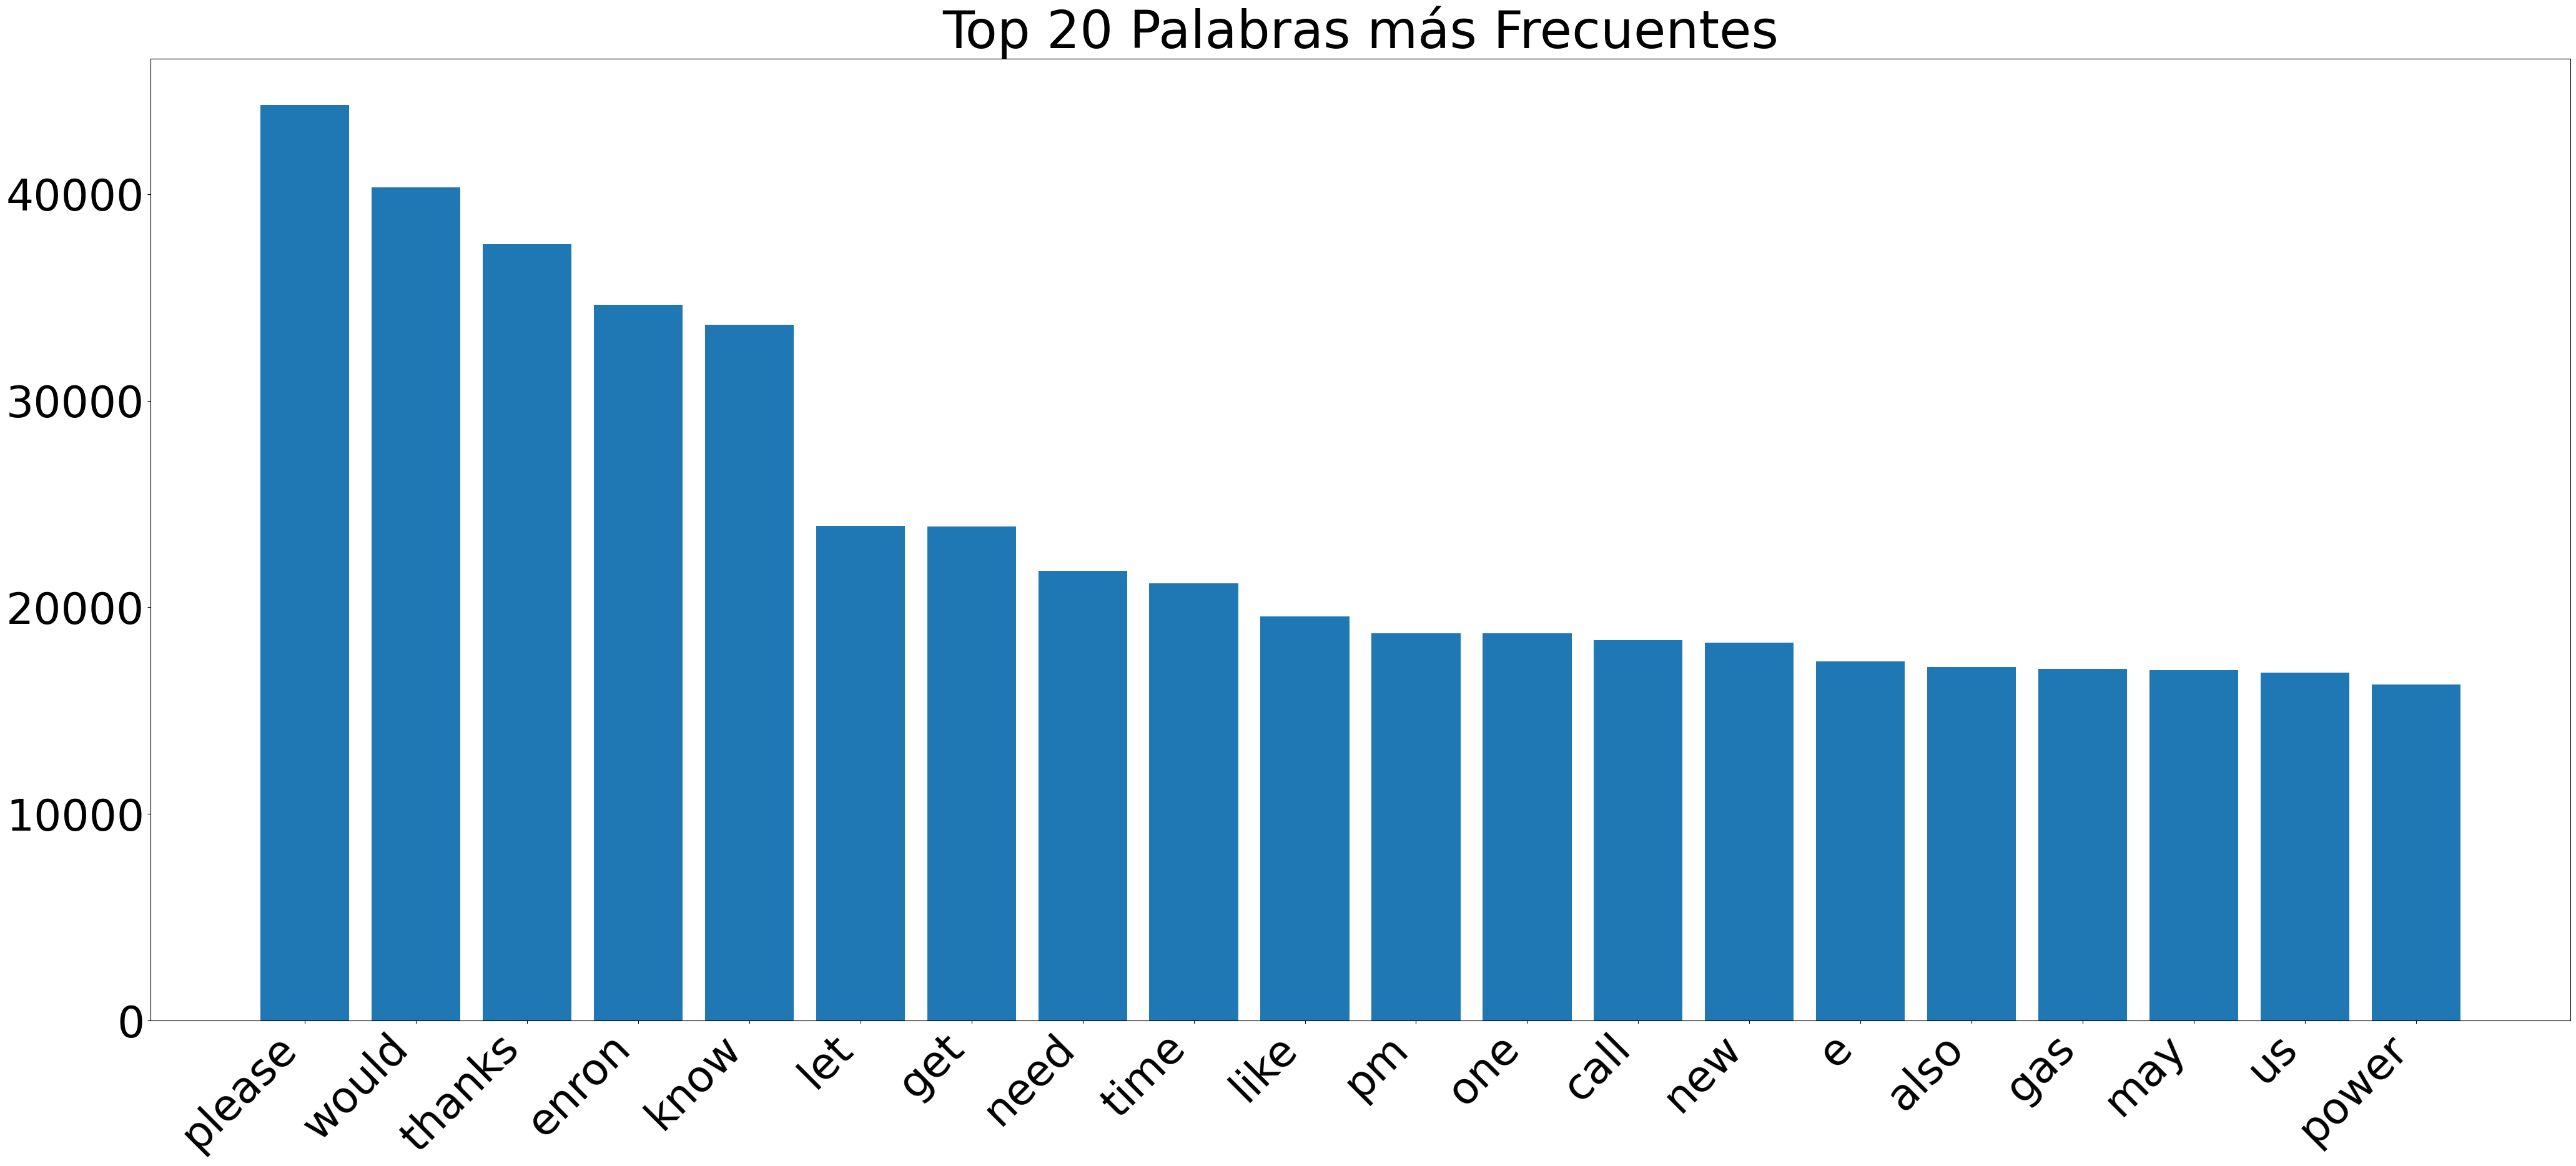

In [8]:
import matplotlib.pyplot as plt
words, frequencies = zip(*word_frequency.most_common(20))
plt.figure(figsize=(50, 20))
plt.bar(words, frequencies)
plt.title('Top 20 Palabras más Frecuentes', fontsize=60)
plt.xticks(rotation=45, ha='right', fontsize=50)
plt.yticks(fontsize=50)
plt.show()

#### WordCloud

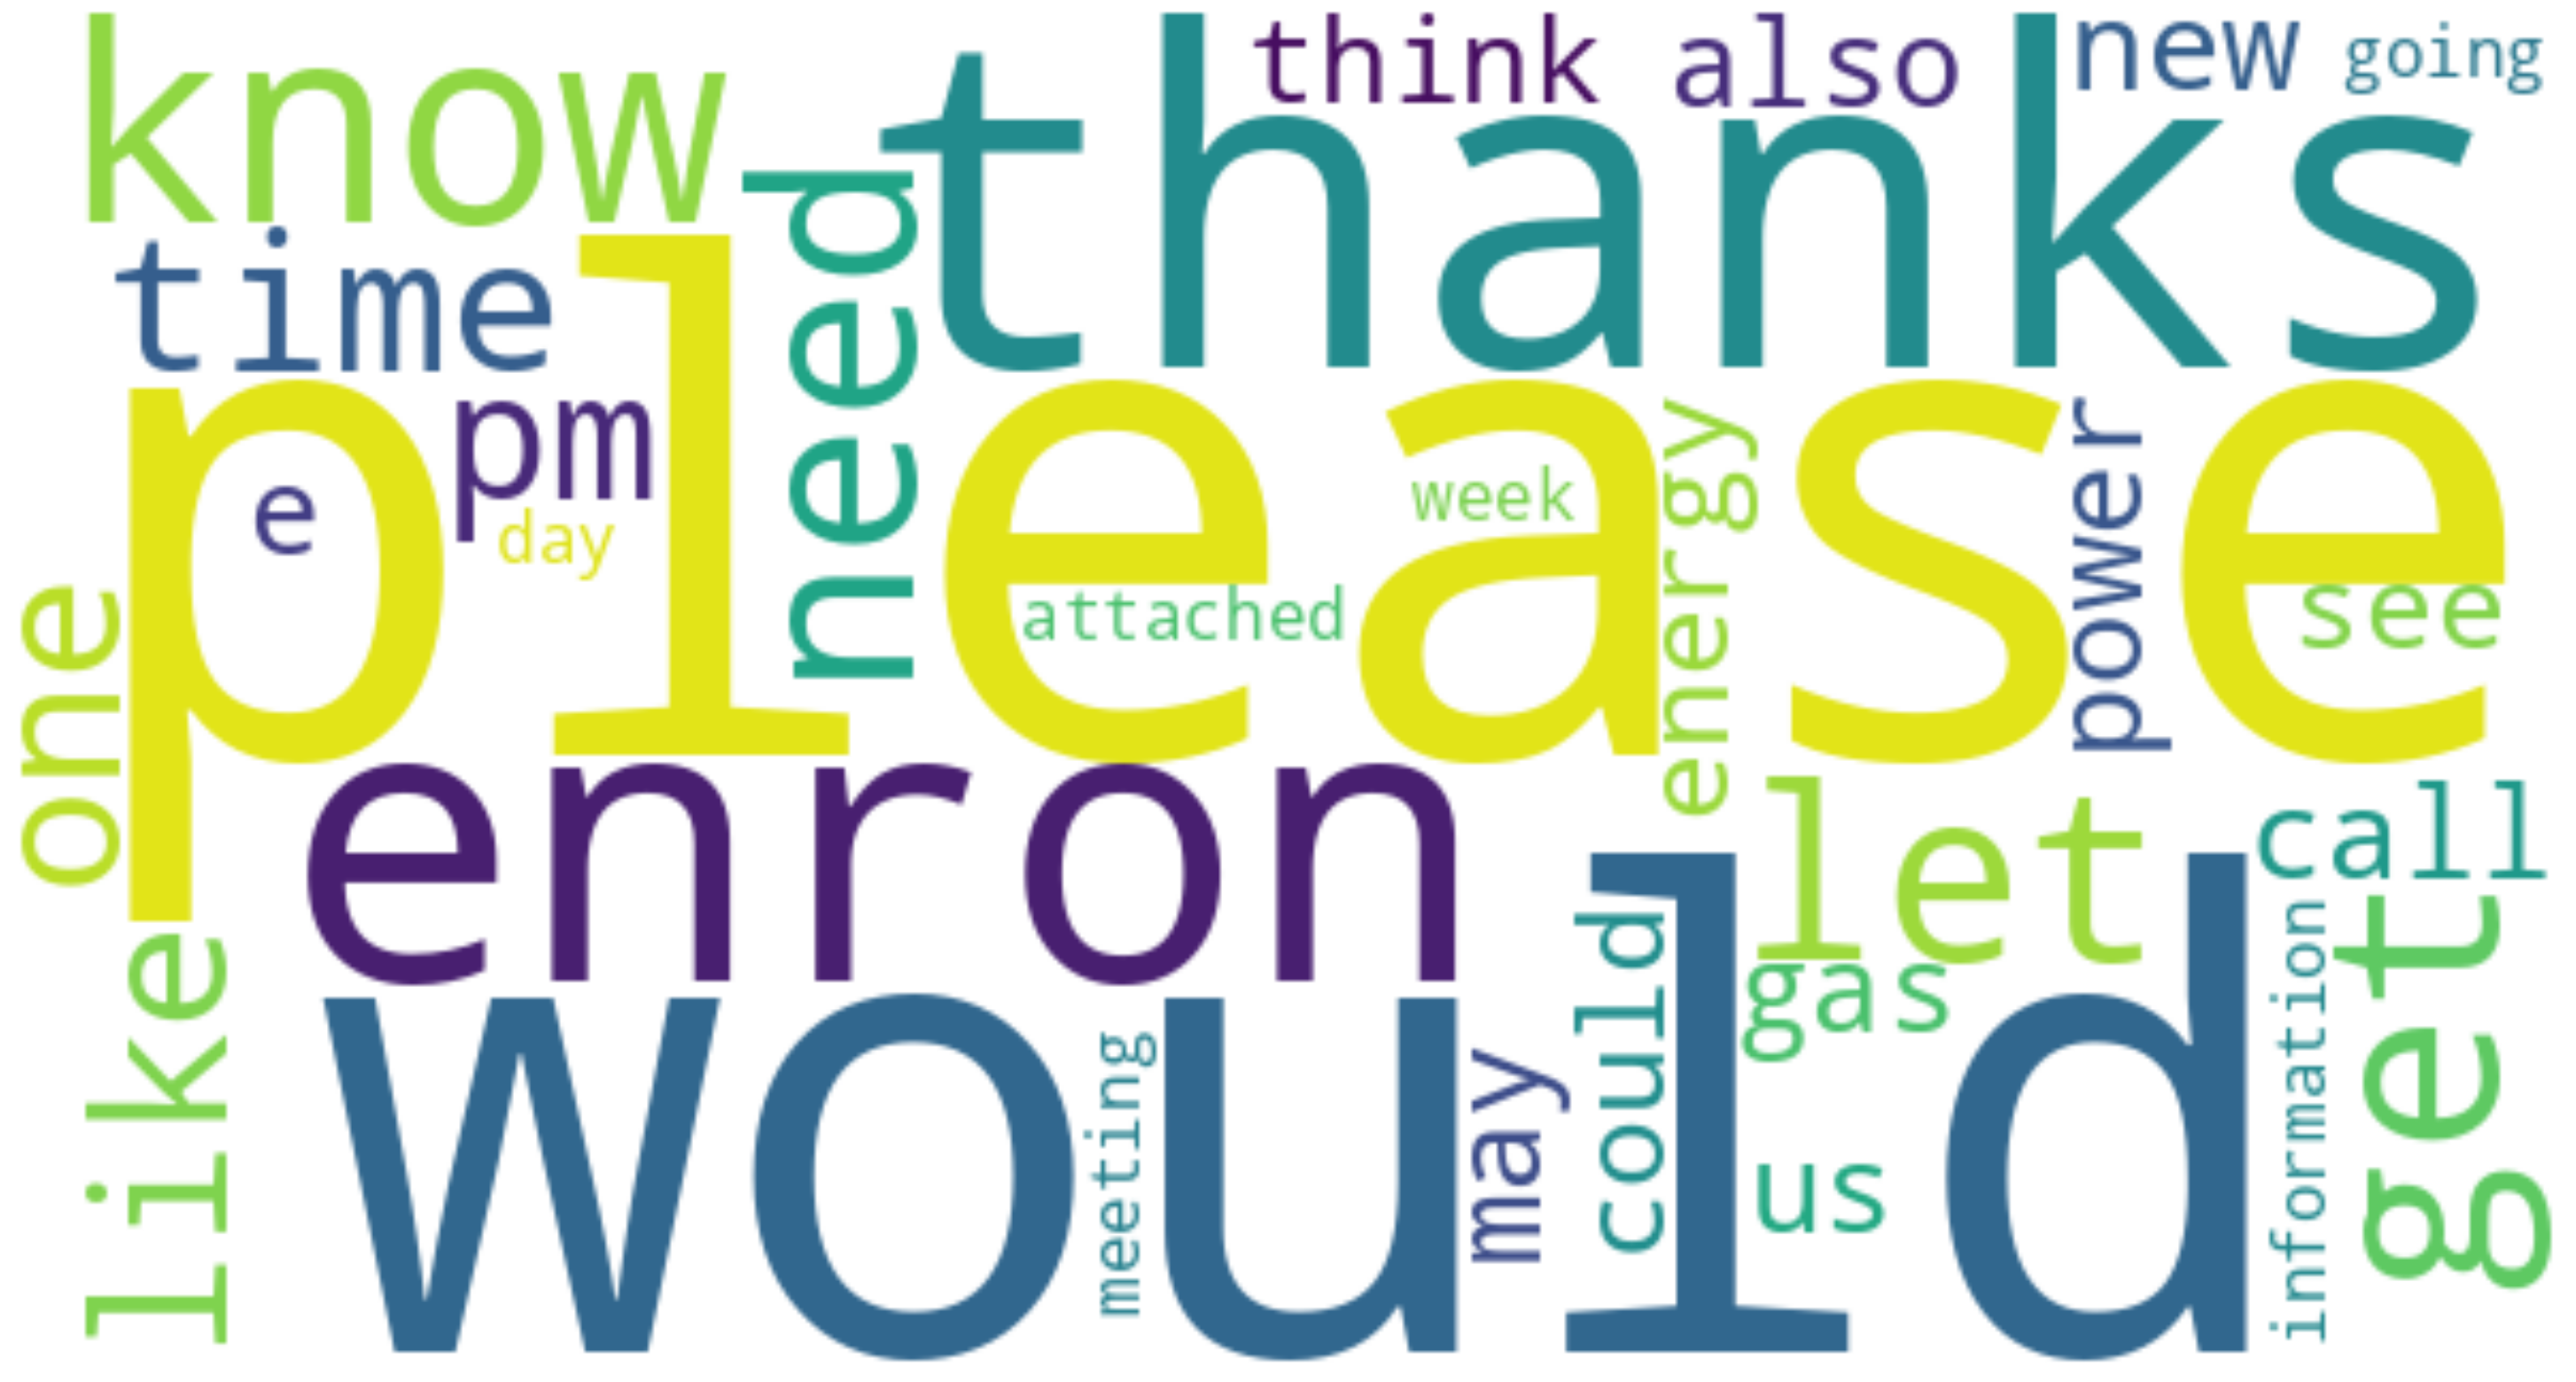

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Crear una Word Cloud
wordcloud = WordCloud(width=600, height=320, background_color='white').generate_from_frequencies(dict(word_frequency.most_common(30)))

# Mostrar la Word Cloud
plt.figure(figsize=(60, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Matriz y Red de Co-ocurrencia

In [8]:
print("Matriz de Co-ocurrencia:")
for key, value in sorted(result_matrix.items(), key=lambda item: item[1], reverse=True)[:20]:
    print(f"{key}: {value}")

Matriz de Co-ocurrencia:
('carol', 'st', 'clair', 'eb', 'phone'): 927
('st', 'clair', 'eb', 'phone', 'fax'): 924
('phone', 'fax', 'carol', 'st', 'clair'): 714
('clair', 'eb', 'phone', 'fax', 'carol'): 712
('eb', 'phone', 'fax', 'carol', 'st'): 712
('enron', 'wholesale', 'services', 'smith', 'street'): 420
('wholesale', 'services', 'smith', 'street', 'houston'): 416
('services', 'smith', 'street', 'houston', 'tx'): 379
('smith', 'street', 'houston', 'tx', 'ph'): 367
('street', 'houston', 'tx', 'ph', 'fax'): 367
('sara', 'shackleton', 'enron', 'wholesale', 'services'): 366
('shackleton', 'enron', 'wholesale', 'services', 'smith'): 366
('let', 'know', 'need', 'anything', 'else'): 249
('na', 'na', 'na', 'na', 'na'): 232
('please', 'let', 'know', 'questions', 'thanks'): 213
('wpd', 'wpd', 'wpd', 'wpd', 'wpd'): 198
('doc', 'doc', 'doc', 'doc', 'doc'): 188
('image', 'image', 'image', 'image', 'image'): 183
('marie', 'heard', 'senior', 'legal', 'specialist'): 171
('anybody', 'pear', 'anybody',

Es a partir de este resultado que se identificaron varios de los correos a limpiar, ya que la co ocurrencia de las palabras permite identificar palabras que se repiten  en diferente orden, con lo cual se pueden identificar patrones de escritura, tales como mensajes de despedida en un correo electronico, firmas de correo, modismos, entre otros. 

In [17]:
'''
import networkx as nx
def visualize_word_network(result_matrix):
    G = nx.Graph()

    for words, weight in result_matrix.items():
        if len(words) >= 2:
            G.add_edge(words[0], words[1], weight=weight)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)  
    nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', font_family='sans-serif', node_color='skyblue', edge_color='gray', linewidths=0.5, alpha=0.7, node_size=1000)
    plt.title('Red de Co-ocurrencia de Palabras')
    plt.show()
    
visualize_word_network(result_matrix)
'''


"\nimport networkx as nx\ndef visualize_word_network(result_matrix):\n    G = nx.Graph()\n\n    for words, weight in result_matrix.items():\n        if len(words) >= 2:\n            G.add_edge(words[0], words[1], weight=weight)\n    plt.figure(figsize=(10, 8))\n    pos = nx.spring_layout(G)  \n    nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', font_family='sans-serif', node_color='skyblue', edge_color='gray', linewidths=0.5, alpha=0.7, node_size=1000)\n    plt.title('Red de Co-ocurrencia de Palabras')\n    plt.show()\n    \nvisualize_word_network(result_matrix)\n"

código de impresión de una grafica de Red de Co-ocurrencia de palabras...

### Comparativo entre palabras mas frecuentes y frecuencia del lematizador

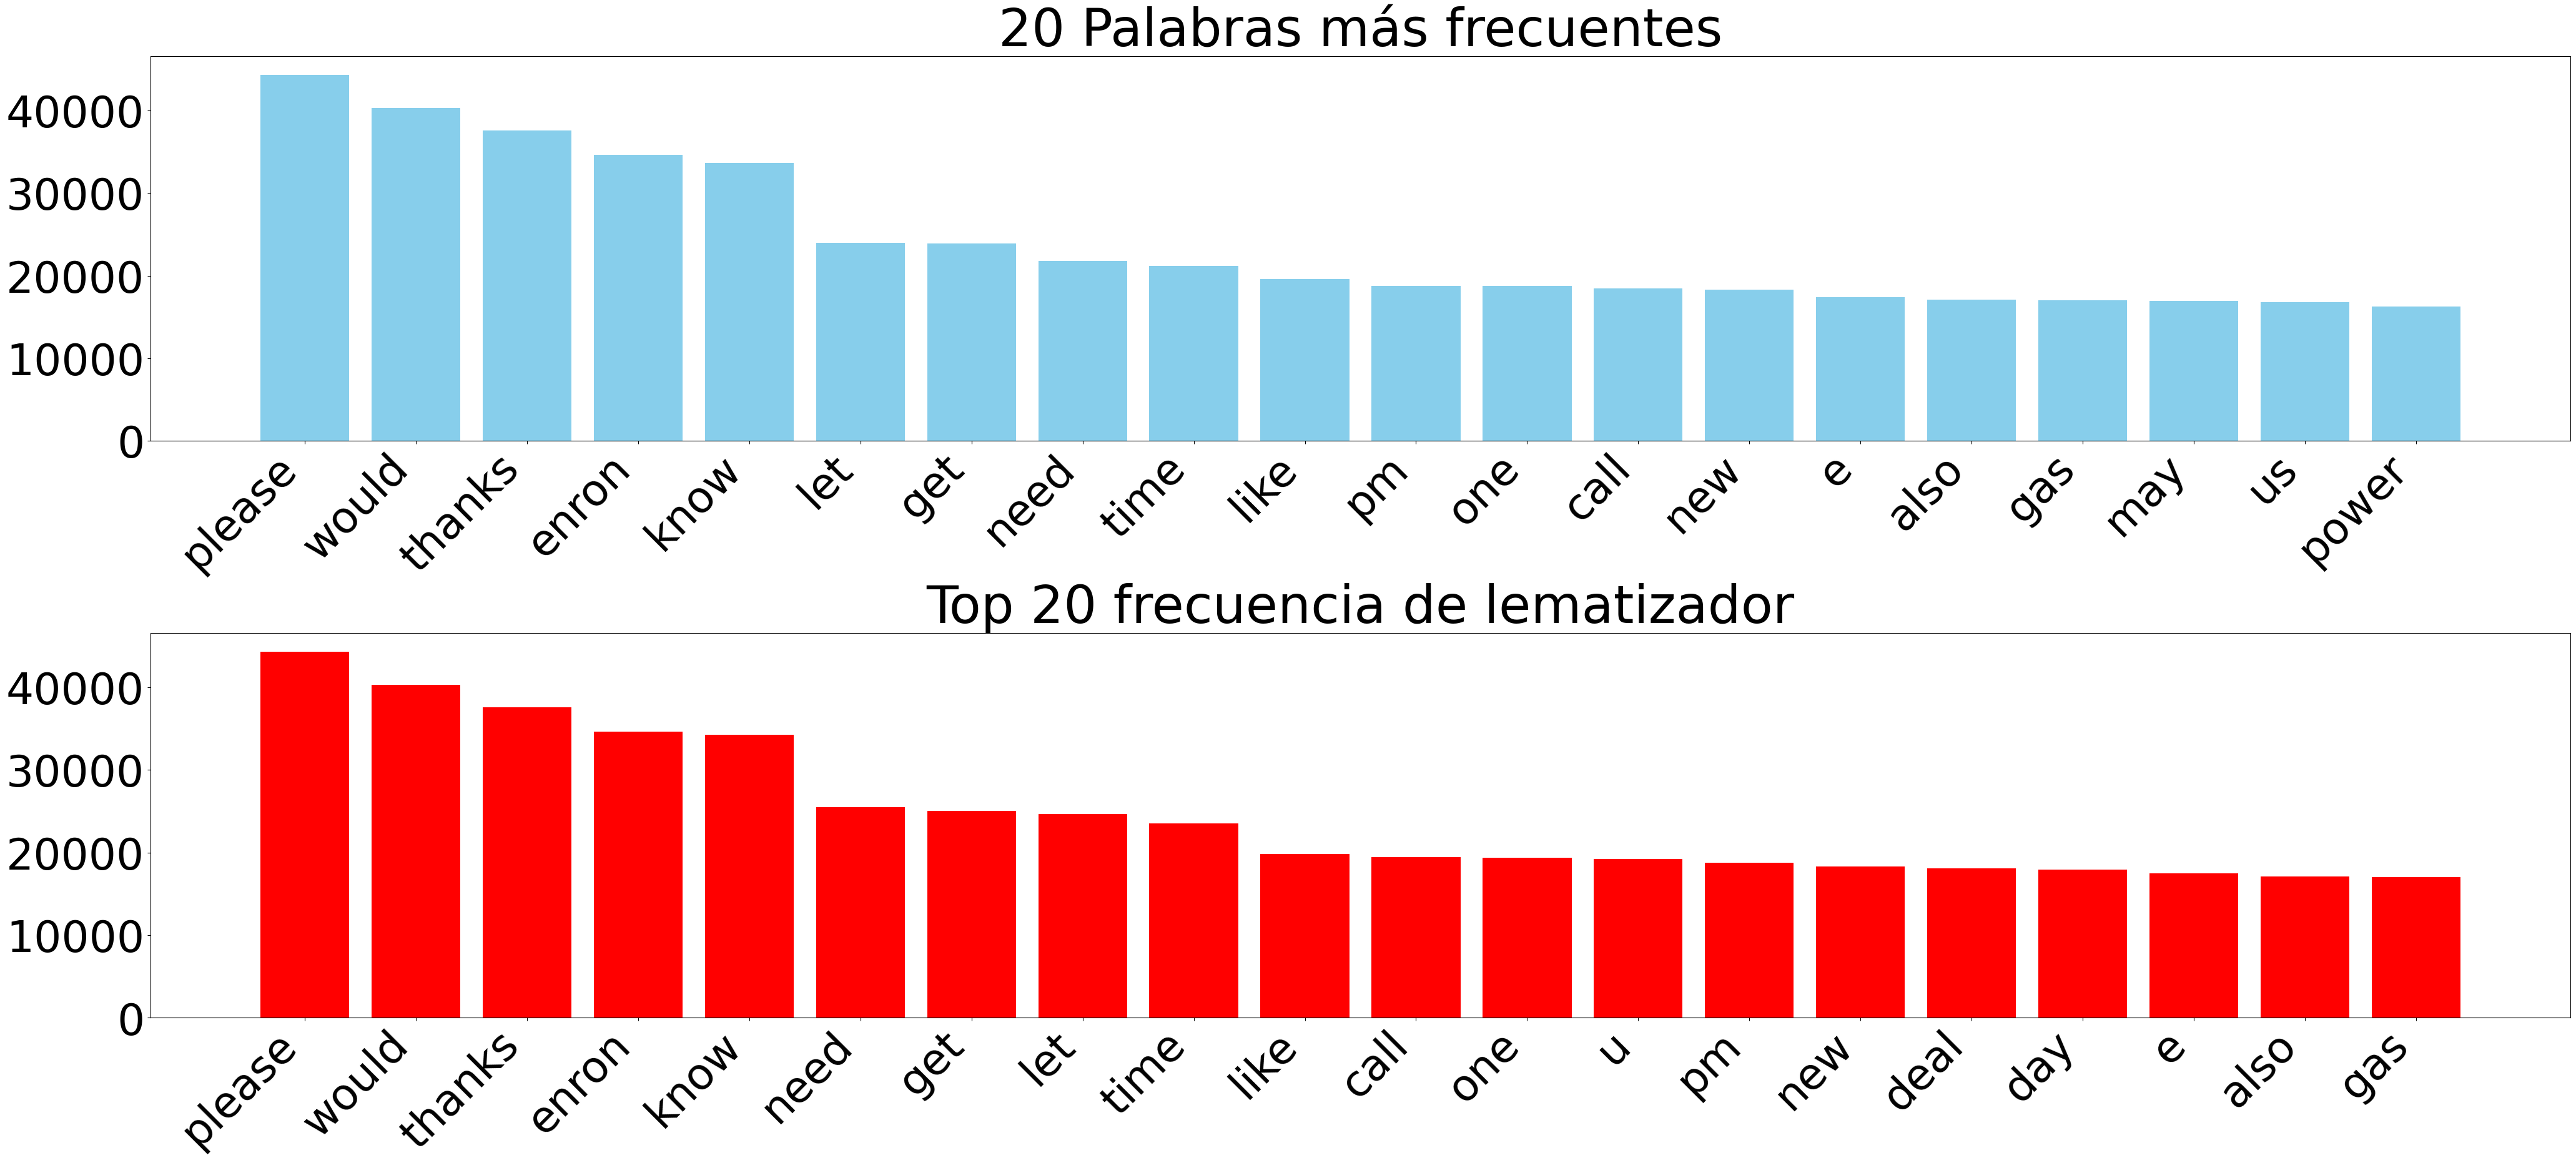

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 20))

plt.subplot(211)
plt.bar(*zip(*word_frequency.most_common(20)), color='skyblue')
plt.title('20 Palabras más frecuentes', fontsize=60)
plt.xticks(rotation=45, ha='right', fontsize=50)
plt.yticks(fontsize=50)

plt.subplot(212)
plt.bar(*zip(*word_counter.most_common(20)), color='red')
plt.title('Top 20 frecuencia de lematizador', fontsize=60)
plt.xticks(rotation=45, ha='right', fontsize=50)
plt.yticks(fontsize=50)

plt.subplots_adjust(hspace=0.5)
plt.show()

El uso del lematizador genera una diferencia notable para el analisis y da una perpectiva diferente a la del conteo de palabras. Este comparativo es de gran ayuda para generar un contexto, que permita implementar el sistema clasificador de relevancias.

#### Frecuenia de N- Gramas

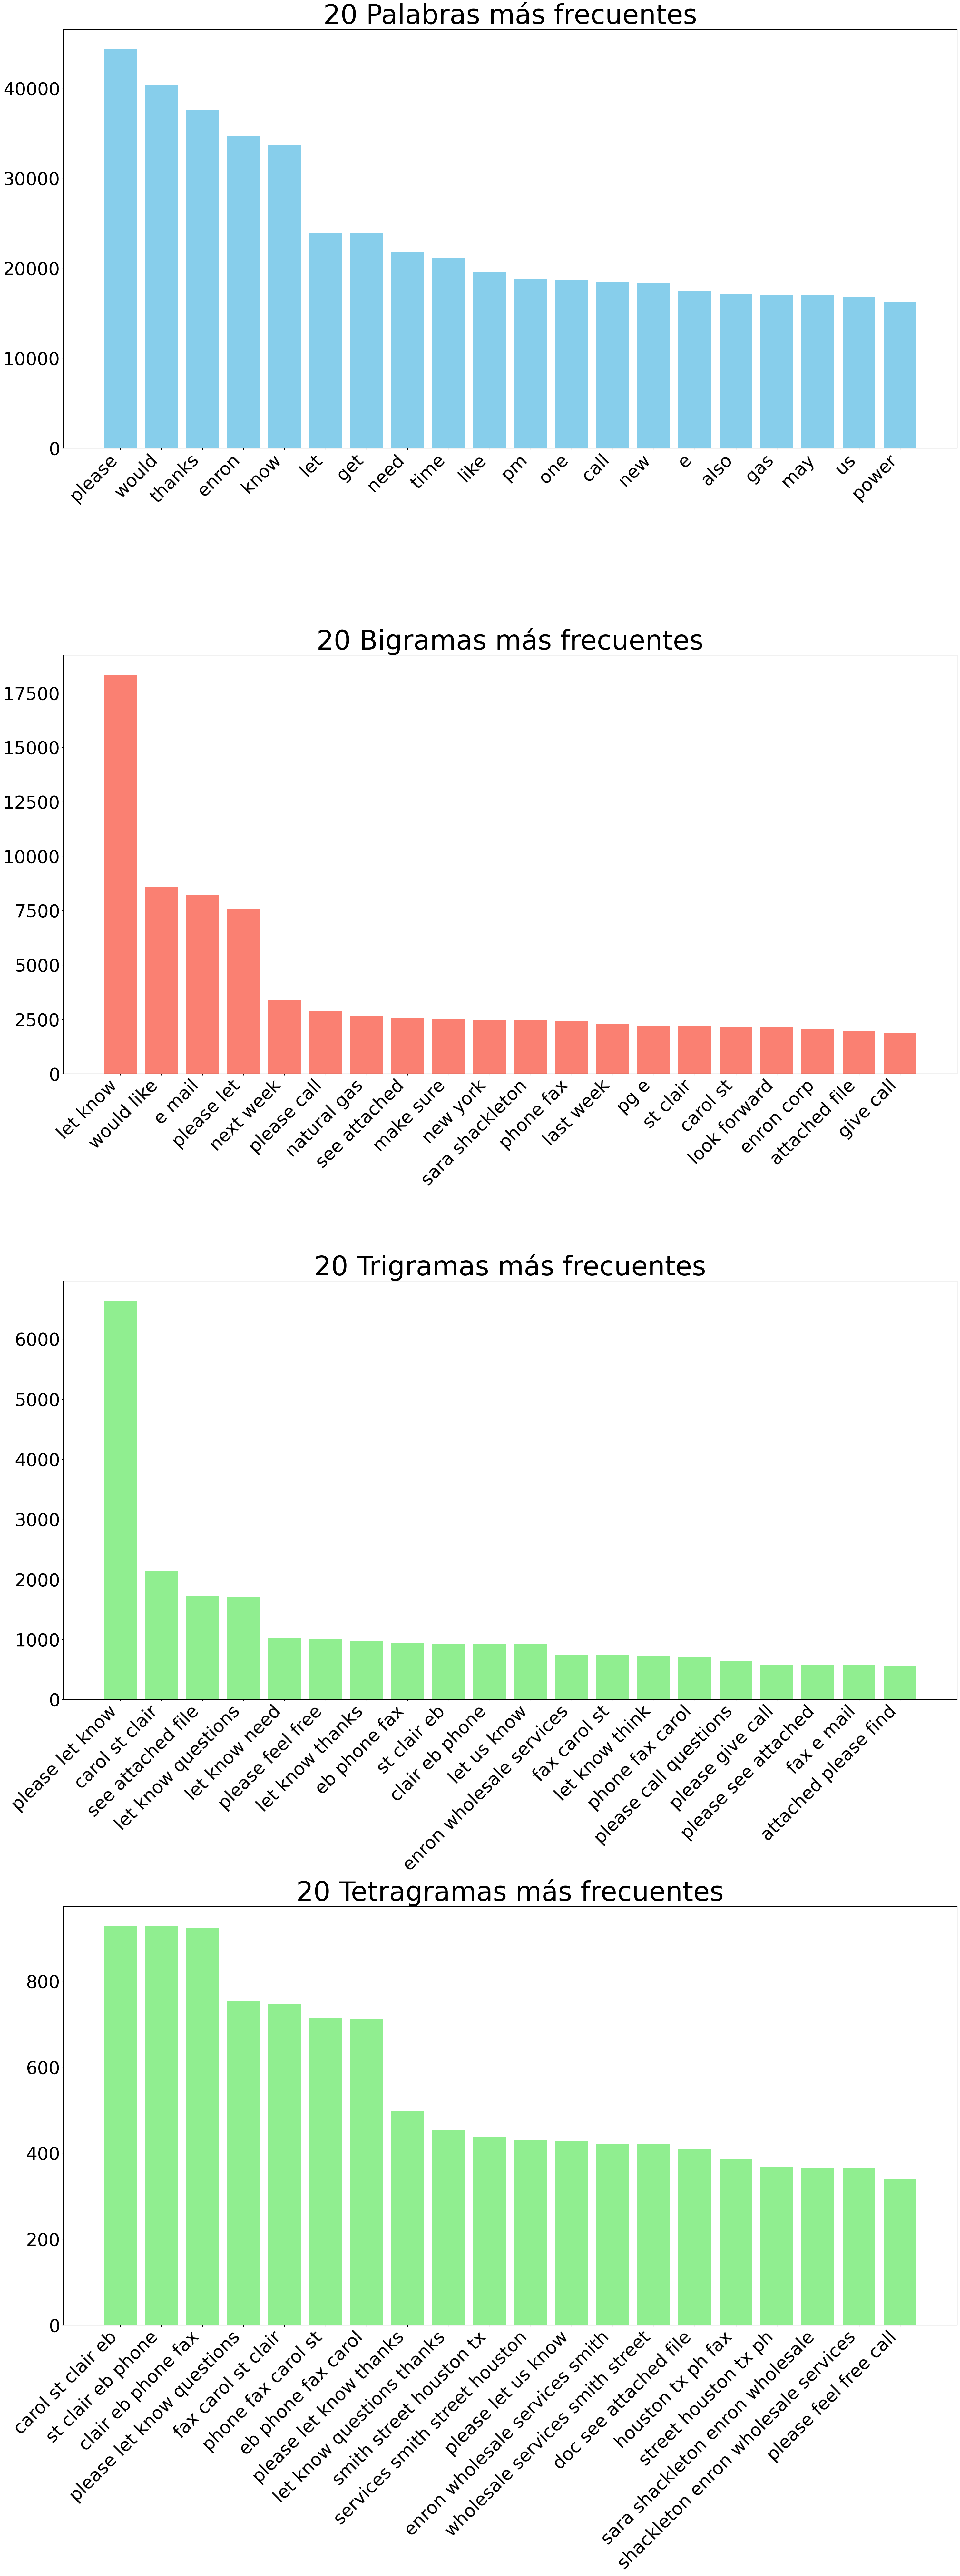

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 80))

plt.subplot(411)
plt.bar(*zip(*word_frequency.most_common(20)), color='skyblue')
plt.title('20 Palabras más frecuentes',fontsize=60)
plt.xticks(rotation=45, ha='right',fontsize=40)
plt.yticks(fontsize=40)

plt.subplot(412)
plt.bar(*zip(*bigram_frequency.most_common(20)), color='salmon')
plt.title('20 Bigramas más frecuentes',fontsize=60)
plt.xticks(rotation=45, ha='right',fontsize=40)
plt.yticks(fontsize=40)

plt.subplot(413)
plt.bar(*zip(*trigram_frequency.most_common(20)), color='lightgreen')
plt.title('20 Trigramas más frecuentes',fontsize=60)
plt.xticks(rotation=45, ha='right',fontsize=40)
plt.yticks(fontsize=40)

plt.subplot(414)
plt.bar(*zip(*ngram_frequency.most_common(20)), color='lightgreen')
plt.title('20 Tetragramas más frecuentes',fontsize=60)
plt.xticks(rotation=45, ha='right',fontsize=40)
plt.yticks(fontsize=40)

plt.tight_layout()
plt.show()


Como se menciono anteriormente, la interpretación de estas graficas son de gran ayuda para el trabajo de limpieza. Sin embargo aun habiendo realizado una depuración de información a limpiar se puede apreciar como aun sigue apareciendo información muy repetitiva que aparenta no ser información objeto del analisis.

En lo pertinente a la continuación de este proyecto se avanzará con la información que ha este momento se tiene graficada, pero es importante tener en cuenta que si se puede realizar aun más limpieza en el texto los resultados mejoran drasticamente.

## Modelado